In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import tensorflow.keras.backend as K
from keras.engine.base_layer import Layer

Using TensorFlow backend.


In [2]:
class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(x):
    return x*K.tanh(K.softplus(x))

get_custom_objects().update({'Mish': Mish(mish)})

In [3]:
import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from collections import deque
import random
import matplotlib.pyplot as plt

In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/eimer/anaconda3/tmp/envs/dac/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/eim

In [251]:
class Model:
  def __init__(self):
    self.model = self.create_model()

  def create_model(self):
    model = Sequential()

    model.add(Dense(128, input_dim=len(env.observation_space.high)+1, kernel_initializer='he_normal'))
    model.add(Mish(mish))
    # model.add(Activation('softplus'))

    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(Mish(mish))
    # model.add(Activation('tanh'))

    model.add(Dense(64, kernel_initializer='he_normal'))
    model.add(Mish(mish))
    # model.add(Activation('tanh'))

    model.add(Dense(env.action_space.n, kernel_initializer='he_normal'))
    # model.add(Activation('softmax'))

    model.compile(loss='mse', optimizer=Adam())
    return model
  
  def get_action(self, state):
    return np.argmax(self.predict(state)) if np.random.random() > epsilon else np.random.randint(env.action_space.n)

  def train(self, x_train, y_train):
    return self.model.train_on_batch(x_train, y_train)
  
  def predict(self, x):
    return self.model.predict(x)
  
  def get_weights(self):
    return self.model.get_weights()

  def set_weights(self, other):
    return self.model.set_weights(other.model.get_weights())
  
  def summary(self):
    return self.model.summary()

In [270]:
def get_state(st):
  return np.reshape(st, (1, len(env.observation_space.high)+1))

In [269]:
def train_the_model():
  if len(memory) < 1000:
    return

  batch = random.sample(memory,min(len(memory), BATCH_SIZE))

  x=[]
  y=[]
  for state, action, reward, next_state, done in batch:
    max_future_q = np.max(target_model.predict(next_state))
    new_q = reward + DISCOUNT * max_future_q * np.invert(done)

    state = get_state(state)
    current_q = model.predict(state)
    current_q[0][action] = new_q

    x.append(state)
    # print(f"x:{len(x)}")
    y.append(current_q)
    # print(f"y:{len(y)}")

  x = np.reshape(np.array(x), (-1, len(env.observation_space.high)+1))
  y = np.reshape(np.array(y), (-1, 2))
  model.train(x, y)

In [275]:
def q_evals(current_set):
    values = []
    mean_q = []
    for i in instances:
        env.length = i
        env.polemass_length = (env.masspole * env.length)
        state = env.reset()
        state = np.array([np.append(state, env.length)])
        state = get_state(state)
        max_future_q = np.max(target_model.predict(state))
        values.append(max_future_q)
        if i in current_set:
            mean_q.append(max_future_q)
    return np.argsort(values), np.mean(mean_q), values

In [272]:
def run_cartpole_rr(seed):
    env = gym.make('CartPole-v0')
    env.seed(seed)
    random.seed(seed)
    np.random.seed(seed)

    EPISODES = 100
    DIM = len(env.observation_space.high)+1
    DISCOUNT = 0.99
    SHOW_AT = 100
    show = False
    BATCH_SIZE = 32

    epsilon = 0.99
    EPSILON_DECAY = 0.99
    MIN_EPSILON = 0.01

    memory = deque(maxlen=10000)
    batch = deque(maxlen=BATCH_SIZE)
    scores = deque(maxlen=100)
    episode_rewards = []
    avg_scores = []

    task_complete = False
    model = Model()
    target_model = Model()
    
    instances = [0.3, 0.4, 0.5]
    curr = 0
        
    rewards = {"overall": [], 0.3: [], 0.4: [], 0.5: []}
    trajectories = {0.3: [], 0.4: [], 0.5: []}
    for episode in range(100):
        if not (episode % SHOW_AT):
            show = True
        else:
            show = False
        episode_reward = 0
        state = env.reset()
        state = np.array([np.append(state, env.length)])
        state = get_state(state)
  
        done = False
        traj =[]
        while not done:
            action = model.get_action(state)
            traj.append(action)
            next_st, reward, done, _ = env.step(action)
            next_state = np.array([np.append(next_st, env.length)])
            next_state = get_state(next_state)
            
            episode_reward += reward

            memory.append((state, action, reward if not done else -100, next_state, done))
            train_the_model()

            if epsilon > MIN_EPSILON:
                epsilon *= EPSILON_DECAY
      
            state = next_state
      
            if show:
                env.render()

            if done:
                env.reset()
                rewards[env.length].append(episode_reward)
                rewards["overall"].append(episode_reward)
                trajectories[env.length].append(traj)
                curr = (curr +1) % len(instances)
                env.length = instances[curr]
                env.polemass_length = (env.masspole * env.length)
                target_model.set_weights(model)
                episode_rewards.append(episode_reward)
                scores.append(episode_reward)
                avg_score = np.mean(scores)
                avg_scores.append(avg_scores)

                if not task_complete and avg_score >= 195 and episode >= 100:
                    solution_episode = next(x[0] for x in enumerate(episode_rewards) if x[1] >= 195) 
                    print(f"Solved at episode no. {solution_episode}")
                    task_complete = True
        
                if not (episode % 10):
                    print(f"Episode: {episode}:- average reward = {avg_score}, max reward till now = {np.max(episode_rewards)}")
    return rewards, trajectories

In [147]:
rew_space = []

In [ ]:
instances = [0.3, 0.4, 0.5]
curr = 0
curr_set = [instances[0]]
size = 1
old_mean = -np.inf
space_rewards = {"overall": [], 0.3: [], 0.4: [], 0.5: []}
space_trajectories = {0.3: [], 0.4: [], 0.5: []}
curriculum = []
values = []
env = gym.make('CartPole-v0')
seed = 0
env.seed(seed)
random.seed(seed)
np.random.seed(seed)

EPISODES = 100
DIM = len(env.observation_space.high)+1
DISCOUNT = 0.99
SHOW_AT = 100
show = False
BATCH_SIZE = 32

epsilon = 0.99
EPSILON_DECAY = 0.99
MIN_EPSILON = 0.01

memory = deque(maxlen=10000)
batch = deque(maxlen=BATCH_SIZE)
scores = deque(maxlen=100)
episode_rewards = []
avg_scores = []

task_complete = False
model = Model()
target_model = Model()
    
for episode in range(EPISODES):

    if not (episode % SHOW_AT):
        show = True
    else:
        show = False

    episode_reward = 0
    state = env.reset()
    state = np.array([np.append(state, env.length)])
    state = get_state(state)
  
    done = False
    traj = []
    while not done:

      action = model.get_action(state)
      traj.append(action)
      next_st, reward, done, _ = env.step(action)
      next_state = np.array([np.append(next_st, env.length)])
      next_state = get_state(next_state)
      episode_reward += reward

      memory.append((state, action, reward if not done else -100, next_state, done))
      train_the_model()

      if epsilon > MIN_EPSILON:
        epsilon *= EPSILON_DECAY
      
      state = next_state
      
      if show:
        env.render()

      if done:
        space_rewards[env.length].append(episode_reward)
        space_rewards["overall"].append(episode_reward)
        space_trajectories[env.length].append(traj)
        env.reset()
        curr = (curr +1) % len(instances)
        if curr == 0:
            indices, mean_q, evals = q_evals(curr_set)
            values.append(evals)
            if np.abs(np.abs(mean_q) - np.abs(old_mean)) < np.abs(old_mean) *0.025:
                size += 1
            old_mean = mean_q
            if size == 1:
                curr_set = [instances[indices[0]]]
            else:
                curr_set = np.array(instances)[indices[:size]]
        else:
            _, _, evals = q_evals(curr_set)
            values.append(evals)
        curriculum.append(indices[:size])
        env.length = instances[curr]
        env.polemass_length = (env.masspole * env.length)
        target_model.set_weights(model)
        episode_rewards.append(episode_reward)
        scores.append(episode_reward)
        avg_score = np.mean(scores)
        avg_scores.append(avg_scores)

        if not task_complete and avg_score >= 195 and episode >= 100:
          solution_episode = next(x[0] for x in enumerate(episode_rewards) if x[1] >= 195) 
          print(f"Solved at episode no. {solution_episode}")
          task_complete = True
        
        if not (episode % 10):
          print(f"Episode: {episode}:- average reward = {avg_score}, max reward till now = {np.max(episode_rewards)}")
  

Episode: 0:- average reward = 27.0, max reward till now = 27.0
Episode: 10:- average reward = 39.36363636363637, max reward till now = 103.0
Episode: 20:- average reward = 31.523809523809526, max reward till now = 103.0
Episode: 30:- average reward = 30.483870967741936, max reward till now = 124.0
Episode: 40:- average reward = 30.097560975609756, max reward till now = 124.0
Episode: 50:- average reward = 33.90196078431372, max reward till now = 145.0
Episode: 60:- average reward = 56.49180327868852, max reward till now = 200.0
Episode: 70:- average reward = 73.88732394366197, max reward till now = 200.0
Episode: 80:- average reward = 88.76543209876543, max reward till now = 200.0
Episode: 90:- average reward = 97.76923076923077, max reward till now = 200.0


In [161]:
rew_space.append(space_rewards)

In [273]:
reward_rr = []
for s in [0, 1, 2, 3, 4, 5]:
    reward_rr.append(run_cartpole_rr(s)[0])

Episode: 0:- average reward = 22.0, max reward till now = 22.0
Episode: 10:- average reward = 23.363636363636363, max reward till now = 41.0
Episode: 20:- average reward = 21.428571428571427, max reward till now = 41.0
Episode: 30:- average reward = 20.0, max reward till now = 41.0
Episode: 40:- average reward = 20.0, max reward till now = 43.0
Episode: 50:- average reward = 20.11764705882353, max reward till now = 43.0
Episode: 60:- average reward = 20.049180327868854, max reward till now = 43.0
Episode: 70:- average reward = 19.661971830985916, max reward till now = 43.0
Episode: 80:- average reward = 20.45679012345679, max reward till now = 62.0
Episode: 90:- average reward = 20.802197802197803, max reward till now = 62.0
Episode: 0:- average reward = 16.0, max reward till now = 16.0
Episode: 10:- average reward = 22.363636363636363, max reward till now = 55.0
Episode: 20:- average reward = 23.0, max reward till now = 55.0
Episode: 30:- average reward = 22.451612903225808, max rewar

In [237]:
import seaborn as sb
sb.set_style("darkgrid")
sb.set_context("paper",  font_scale = 4,
                   rc={
                       "grid.linewidth": 3.75,
                       'axes.labelsize': 35,
                       "axes.titlesize": 32,
                       "legend.fontsize": 28.0,
                       'lines.linewidth': 5,
                       'xtick.labelsize': 28.0,
                       'ytick.labelsize': 28.0,
                   })
current_palette = list(sb.color_palette())
colors = {
        'RL': current_palette[0],
        'RR': current_palette[5],
        'SOP':current_palette[4],
        'RAND':current_palette[7],
        'optimal':current_palette[1],
        '0':current_palette[-2],
        '1':current_palette[-1]
    }

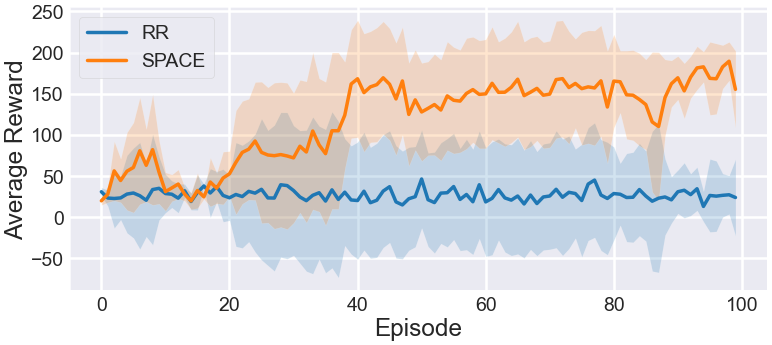

In [238]:
mean_space = np.mean([rew_space[i]["overall"] for i in range(len(rew_space))], axis=0)
std_space = np.std([rew_space[i]["overall"] for i in range(len(rew_space))], axis=0)

mean_rr = np.mean([reward_rr[i]["overall"] for i in range(len(reward_rr))], axis=0)
std_rr = np.std([reward_rr[i]["overall"] for i in range(len(reward_rr))], axis=0)

fig = plt.figure(figsize=(18, 7.5), dpi=50)
plt.plot(np.arange(len(mean_rr)), mean_rr, label="RR")
plt.fill_between(np.arange(len(mean_rr)), mean_rr+std_space, mean_rr-std_space, alpha=0.2)
plt.plot(np.arange(len(mean_space)), mean_space, label="SPACE")
plt.fill_between(np.arange(len(mean_space)), mean_space+std_space, mean_space-std_space, alpha=0.2)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.legend()
plt.show()

Text(0, 0.5, 'Instance used')

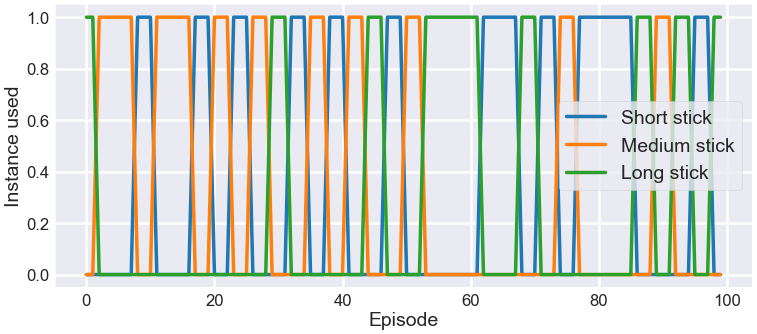

In [234]:
mask_inst1 = []
mask_inst3 = []
mask_inst2 = []
for c in curriculum:
    if 0 in c:
        mask_inst1.append(1)
    else:
        mask_inst1.append(0)
    if 1 in c:
        mask_inst2.append(1)
    else:
        mask_inst2.append(0)
    if 2 in c:
        mask_inst3.append(1)
    else:
        mask_inst3.append(0)
        
fig = plt.figure(figsize=(18, 7.5), dpi=50)
plt.plot(np.arange(len(mask_inst1)), mask_inst1, label="Short stick")
#fig = plt.figure(figsize=(18, 7.5), dpi=50)
plt.plot(np.arange(len(mask_inst1)), mask_inst2, label="Medium stick")
#fig = plt.figure(figsize=(18, 7.5), dpi=50)
plt.plot(np.arange(len(mask_inst1)), mask_inst3, label="Long stick")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Instance used")

Text(0, 0.5, 'State Values')

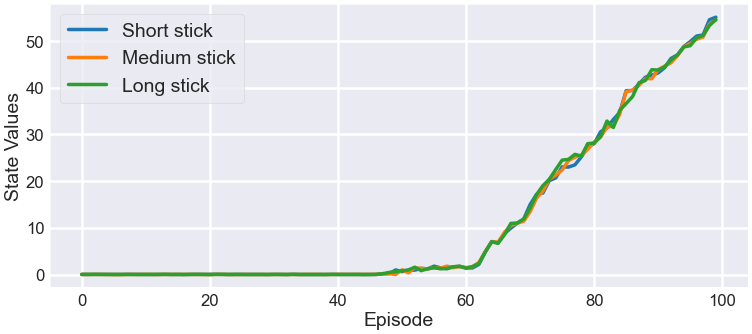

In [225]:
evs = values
evals_inst1 = [e[0] for e in evs]
evals_inst2 = [e[1] for e in evs]
evals_inst3 = [e[2] for e in evs]

fig = plt.figure(figsize=(18, 7.5), dpi=50)
plt.plot(np.arange(len(evals_inst1)), evals_inst1, label="Short stick")
plt.plot(np.arange(len(evals_inst2)), evals_inst2, label="Medium stick")
plt.plot(np.arange(len(evals_inst3)), evals_inst3, label="Long stick")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("State Values")

In [90]:
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

resize = T.Compose([T.ToPILImage(),
                    T.Resize(40, interpolation=Image.CUBIC),
                    T.ToTensor()])

device = torch.device("cpu")

def get_cart_location(screen_width):
    world_width = env.x_threshold * 2
    scale = screen_width / world_width
    return int(env.state[0] * scale + screen_width / 2.0)  # MIDDLE OF CART

def get_screen():
    # Returned screen requested by gym is 400x600x3, but is sometimes larger
    # such as 800x1200x3. Transpose it into torch order (CHW).
    screen = env.render(mode='rgb_array').transpose((2, 0, 1))
    # Cart is in the lower half, so strip off the top and bottom of the screen
    _, screen_height, screen_width = screen.shape
    screen = screen[:, int(screen_height*0.4):int(screen_height * 0.8)]
    view_width = int(screen_width * 0.6)
    cart_location = get_cart_location(screen_width)
    if cart_location < view_width // 2:
        slice_range = slice(view_width)
    elif cart_location > (screen_width - view_width // 2):
        slice_range = slice(-view_width, None)
    else:
        slice_range = slice(cart_location - view_width // 2,
                            cart_location + view_width // 2)
    # Strip off the edges, so that we have a square image centered on a cart
    screen = screen[:, :, slice_range]
    # Convert to float, rescale, convert to torch tensor
    # (this doesn't require a copy)
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    # Resize, and add a batch dimension (BCHW)
    return resize(screen).unsqueeze(0).to(device)

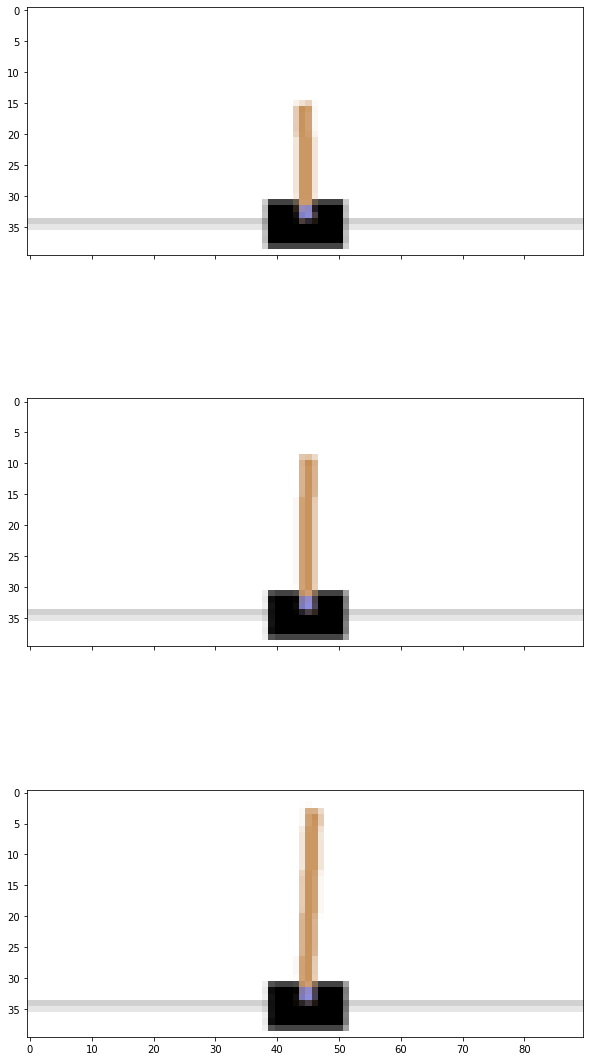

In [109]:
env = gym.make('CartPole-v0').unwrapped
fig, axs = plt.subplots(3, figsize=(8,18), sharex=True)
env.length = 0.3
env.polemass_length = (env.masspole * env.length)
env.reset()
axs[0].imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
env.length = 0.4
env.polemass_length = (env.masspole * env.length)
env.reset()
axs[1].imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
env.length = 0.5
env.polemass_length = (env.masspole * env.length)
env.reset()
axs[2].imshow(get_screen().cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(pad=0.0)
plt.show()